In [1]:
from BaconShor import BaconShorCirc

# Initialization

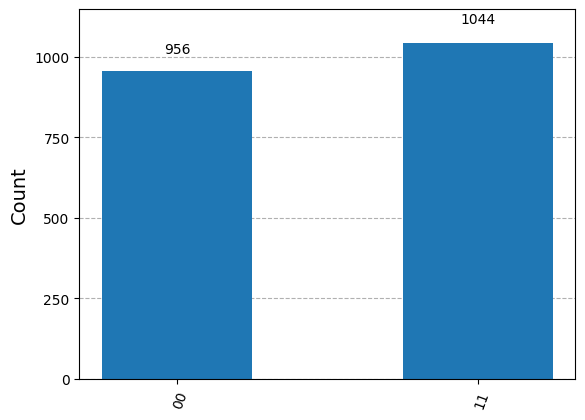

In [2]:
number_of_logical_qubits = 2
logical_state_dim = (3,3)
my_circ = BaconShorCirc(number_of_logical_qubits, 
                        logical_state_dim)

my_circ.initialize_logical(0, "+")
my_circ.initialize_logical(1, "0")
my_circ.CX(0, 1)

my_circ.measure_logical(0)
my_circ.measure_logical(1)

raw_results, filtered_results, plot = my_circ.run_with_plot()
plot

# Error correction

My code assumes vertical Z stabilizers (columns) and horizontal X stabilizers (rows).

### Add one X error

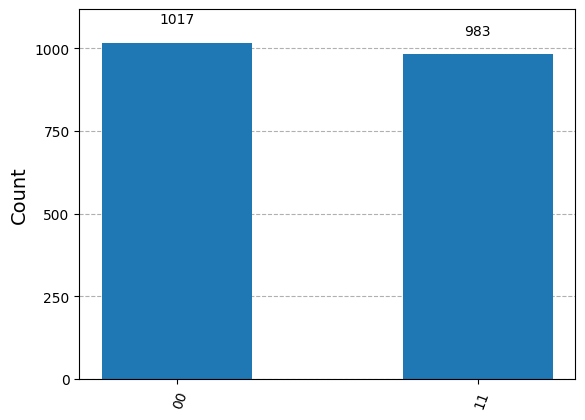

In [3]:
number_of_logical_qubits = 2
logical_state_dim = (3,3)
my_circ = BaconShorCirc(number_of_logical_qubits, 
                        logical_state_dim)

my_circ.initialize_logical(0, "+")
my_circ.initialize_logical(1, "0")
my_circ.CX(0, 1)
my_circ.qc.x(0) # inject error

my_circ.syndrome_extraction(0)
my_circ.syndrome_extraction(1)
my_circ.do_ec(0)
my_circ.do_ec(1)

my_circ.measure_logical(0)
my_circ.measure_logical(1)

raw_results, filtered_results, plot = my_circ.run_with_plot()
plot

Nothing happens due to a single X error. This is bacause the code distance is 3. After one error, we are still closer to the correct state, but after two non-commuting errors, we are closer to the wrong state.

### Add two X errors

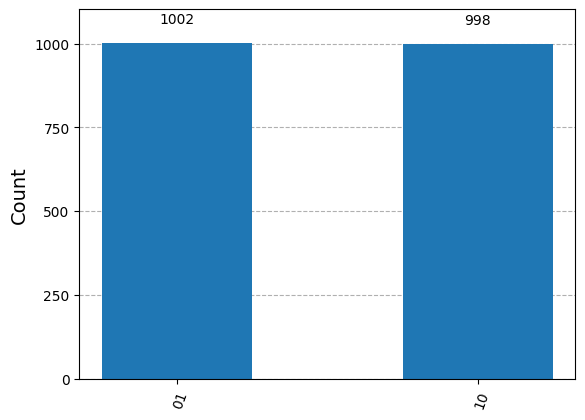

In [4]:
number_of_logical_qubits = 2
logical_state_dim = (3,3)
my_circ = BaconShorCirc(number_of_logical_qubits, 
                        logical_state_dim)

my_circ.initialize_logical(0, "+")
my_circ.initialize_logical(1, "0")
my_circ.CX(0, 1)
my_circ.qc.x(0) # inject error
my_circ.qc.x(1)

my_circ.syndrome_extraction(0)
my_circ.syndrome_extraction(1)
my_circ.do_ec(0)
my_circ.do_ec(1)

my_circ.measure_logical(0)
my_circ.measure_logical(1)

raw_results, filtered_results, plot = my_circ.run_with_plot()
plot

### Add three X errors (flip first row)

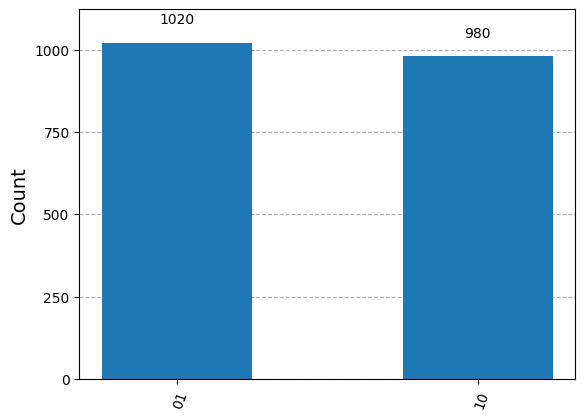

In [5]:
number_of_logical_qubits = 2
logical_state_dim = (3,3)
my_circ = BaconShorCirc(number_of_logical_qubits, 
                        logical_state_dim)

my_circ.initialize_logical(0, "+")
my_circ.initialize_logical(1, "0")
my_circ.CX(0, 1)
my_circ.qc.x(0) # inject error
my_circ.qc.x(1)
my_circ.qc.x(2) 

my_circ.syndrome_extraction(0)
my_circ.syndrome_extraction(1)
my_circ.do_ec(0)
my_circ.do_ec(1)

my_circ.measure_logical(0)
my_circ.measure_logical(1)

raw_results, filtered_results, plot = my_circ.run_with_plot()
plot

## Demonstrate error correction

To show that error correction works, we can add a logical error (apply X on a full row) with error correction after each qubit flip.

The following example injects three errors equivalent to a logical error. Since we correct after each error, we end up with zero errors.

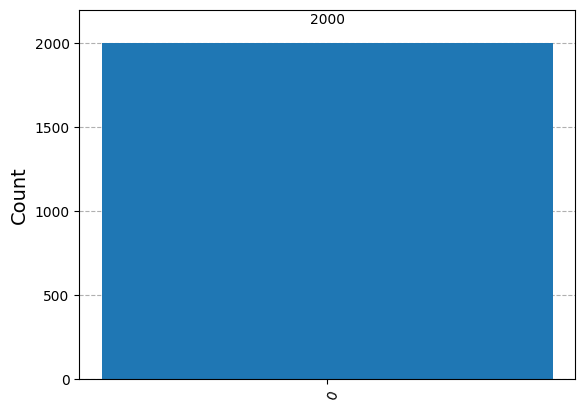

In [6]:
number_of_logical_qubits = 1
logical_state_dim = (3,3)
my_circ = BaconShorCirc(number_of_logical_qubits, 
                        logical_state_dim)

my_circ.initialize_logical(0, "0")

# first error + EC
my_circ.qc.x(0)
my_circ.syndrome_extraction(0)
my_circ.do_ec(0)
# second error + EC
my_circ.qc.x(1)
my_circ.syndrome_extraction(0)
my_circ.do_ec(0)
# third error + EC
my_circ.qc.x(3)
my_circ.syndrome_extraction(0)
my_circ.do_ec(0)

my_circ.measure_logical(0)


raw_results, filtered_results, plot = my_circ.run_with_plot()
plot